In [8]:
import logomaker
import pickle
import math
import matplotlib.pyplot as plt

def plot_clusters_logos(clusters, rows):
    n = len(clusters)
    print(len(rows))
    fig = plt.figure(figsize=(10,30), constrained_layout= True)
    i = 0
    for cluster in clusters:
        # if i < 15:
            ax = plt.subplot2grid((n,4), (i,0), colspan=3)
            peptides = clusters[cluster]
            peptides_matrix = logomaker.alignment_to_matrix(sequences = peptides, to_type="probability")
            lm = logomaker.Logo(
                peptides_matrix,
                fade_probabilities = True,
                stack_order= "small_on_top",
                ax=ax
            )
            lm.highlight_position(1)
            lm.highlight_position(8)
            ax.set_title(f"cluster title: {cluster} \n number of peptides: {len(peptides)}")
            ax.set_ylabel("probability")
            ax.set_xlabel("residue number")

            positive_entries = [float(row[3]) for row in rows if row[2] in peptides and float(row[3]) < 500]
            negative_entries = [float(row[3]) for row in rows if row[2] in peptides and float(row[3]) > 500]
            ax = plt.subplot2grid((n,4), (i,3))
            plt.bar(["Positive", "Negative"], [len(positive_entries), len(negative_entries)])
            ax.set_title(f"BA distribution for cluster {cluster} \n positive values have a BA < 500")
            i+=1
    plt.show()

8354
8354


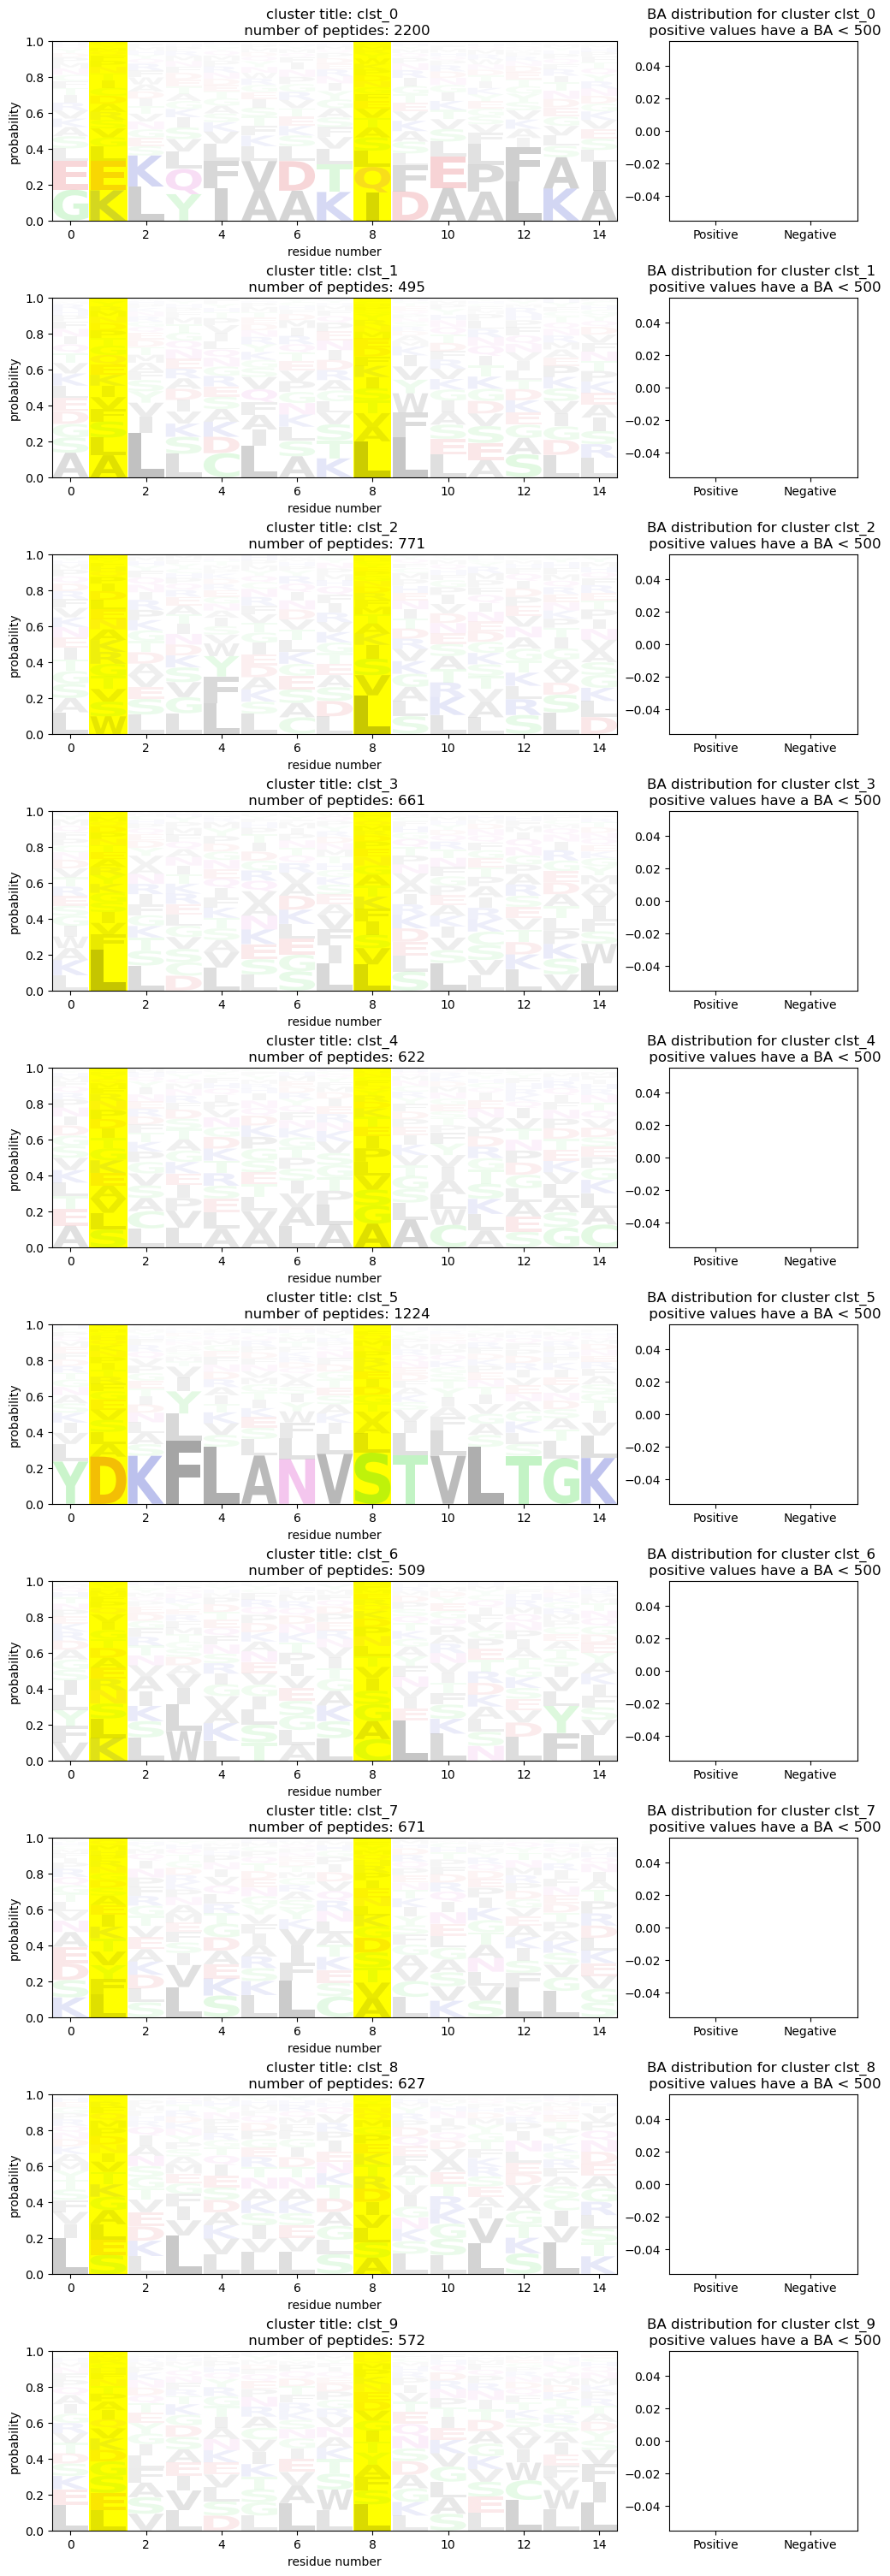

In [13]:
clusters = pickle.load(open("/projects/0/einf2380/data/external/processed/II/IDs_BA_DRB0101_MHCII_15mers_PAM250_10_clusters.pkl", "rb"))

with open("/projects/0/einf2380/data/external/processed/II/IDs_BA_DRB10101_MHCII_15mers.csv", "r") as csv_f:
    rows = [row.replace("\n", "").split(",") for row in csv_f];
    print(len(rows))

plot_clusters_logos(clusters, rows)

In [ ]:
import sys
sys.path.append('../0_build_db1')
import cluster_peptides as cp

clusters = cp.parse_gibbscluster_out('./test_1193116/res/')